In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import numpy as np
import re
import seaborn as sns

In [2]:
#using the cleaned data of the TextBlob sentiment analysis set for visualisation

data=pd.read_csv('non_clean_lib1.csv', parse_dates=['Date'])
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data
data["Date"] = pd.to_datetime(data["Date"])

In [3]:
#data.set_index('Date')
#converting the date present in the csv file into a date time format and accessing the date,month and year from the data that is removing the time 

for i in range(len(data["Date"])):
    data["Date"].iloc[i]=data["Date"].iloc[i].strftime("%d/%m/%y")

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


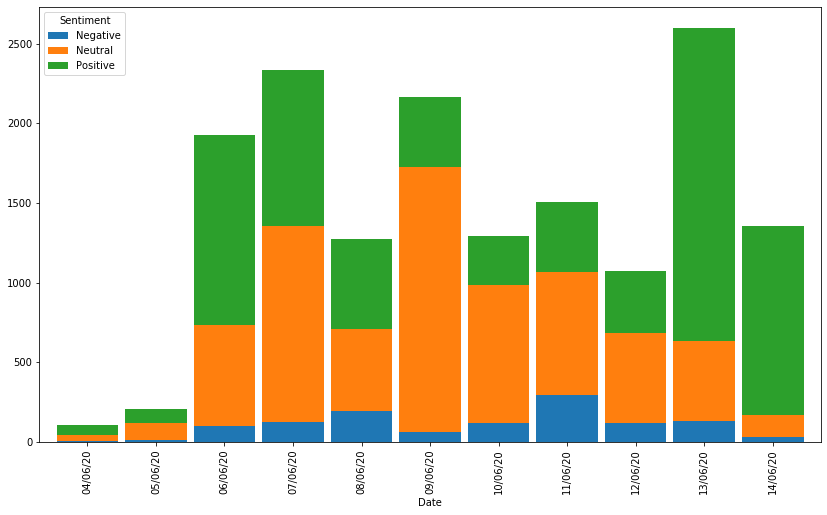

In [4]:
#grouping the data by date and  Sentiments and then counting the number of positive , negative and neutral sentiment for each day.

sentiment_dates = data.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()

#plotting the stacked bar graph with respect to time 

sentiment_dates.plot(kind='bar',stacked=True,width=0.9,figsize=(14, 8))

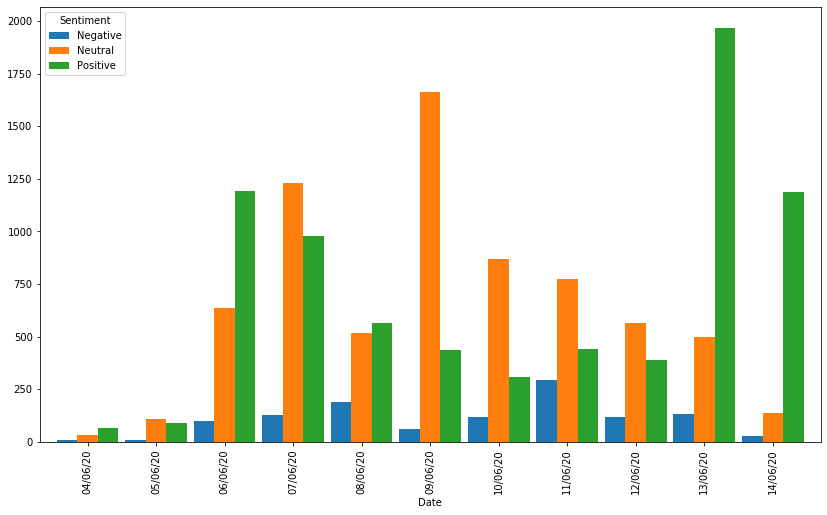

In [5]:
#plotting the bar graph with respect to time
sentiment_dates.plot(kind='bar',width=0.9,figsize=(14, 8))

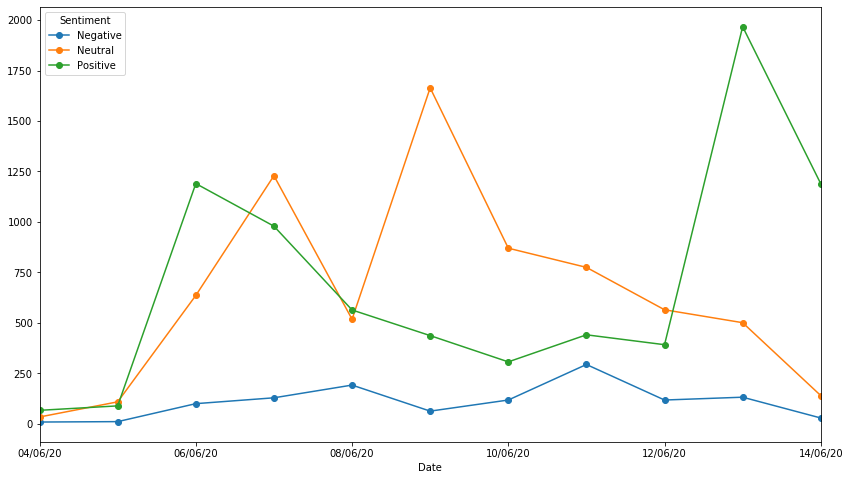

In [6]:
#plotting the line graph graph with respect to time

sentiment_dates.plot(kind='line',marker = 'o',figsize=(14, 8))

In [7]:
#data.groupby(["User","Sentiment"])

profile=data["User"].value_counts().head(10)


In [8]:
profile

Secretary_DFPD     30
vyangakaar         25
Gopssays           25
patalvaasi         23
Official_AkashJ    21
pennewstweet       20
10Ieshwar          17
Kdsinghbh          14
PIBAhmedabad       13
DrSanjayPSahoo     13
Name: User, dtype: int64

In [9]:
#data.set_index("User")

In [10]:

data=data.iloc[data.groupby('User').User.transform('size').argsort(kind='mergesort')]

In [11]:
arr=data["User"].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

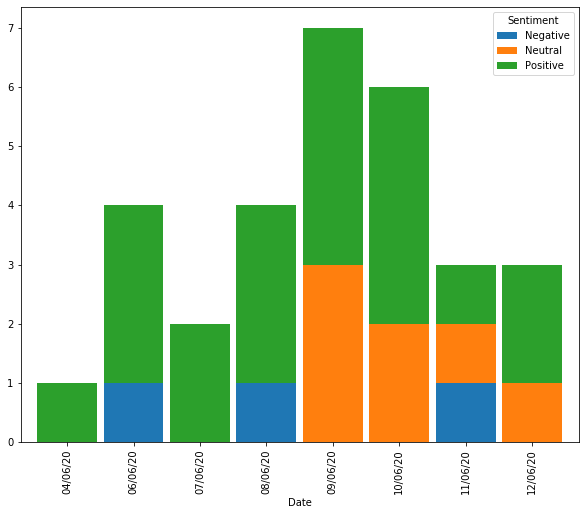

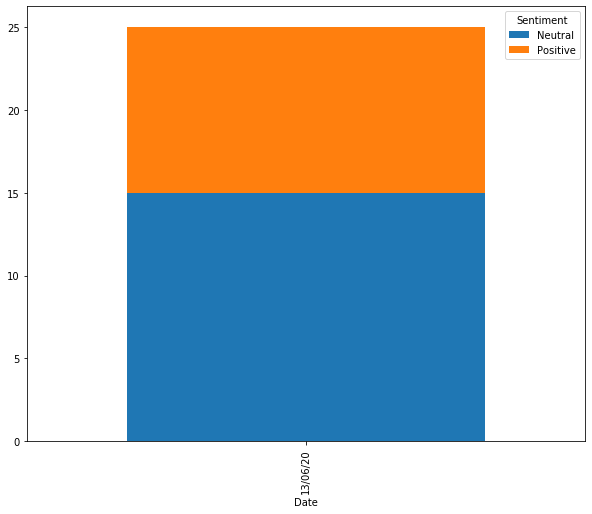

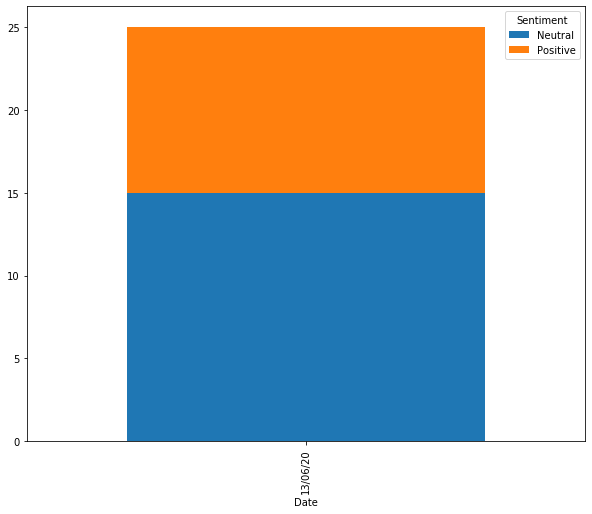

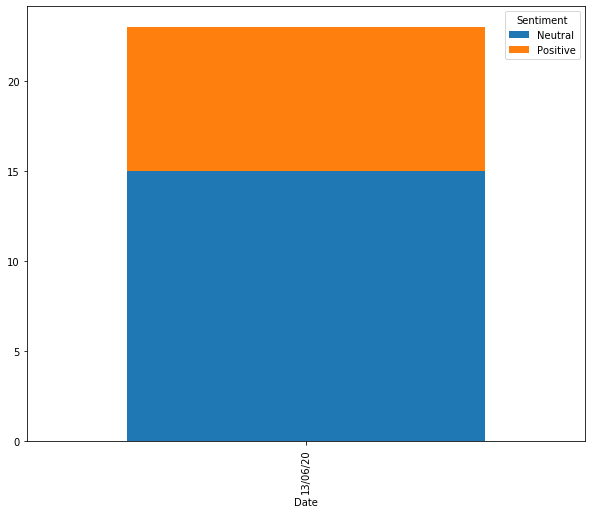

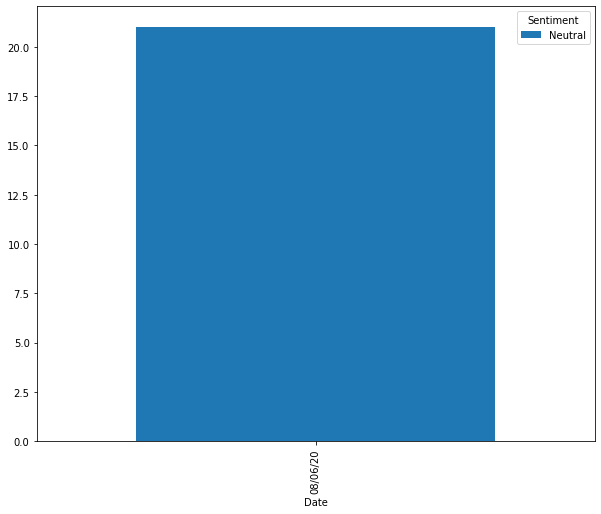

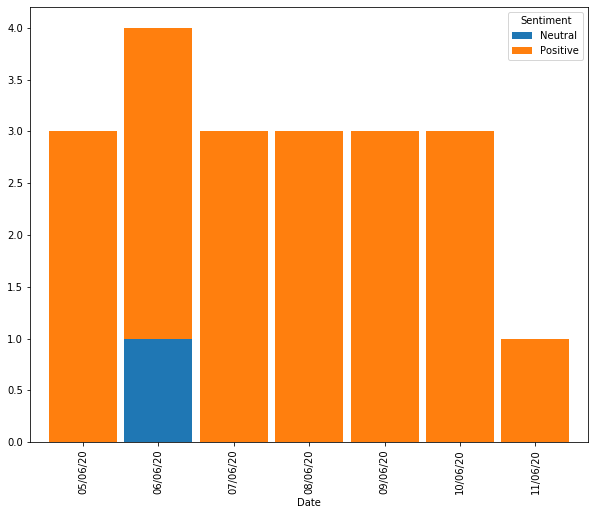

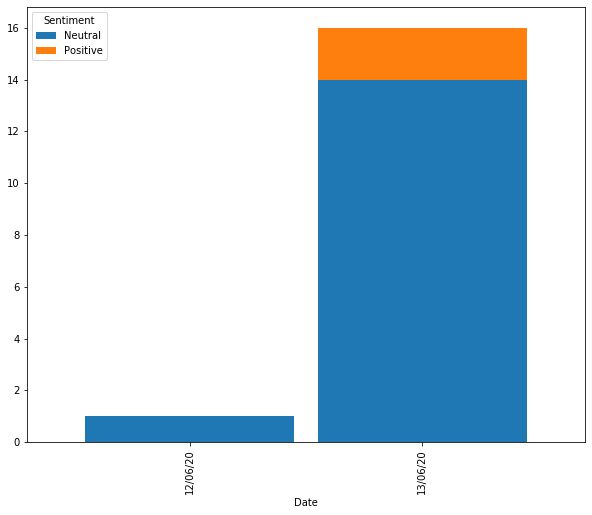

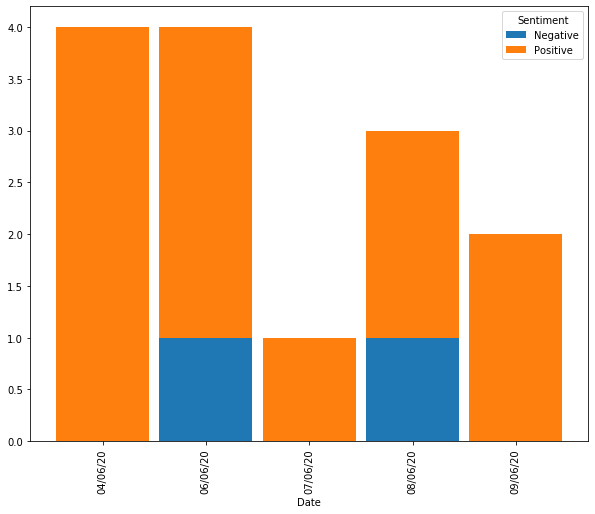

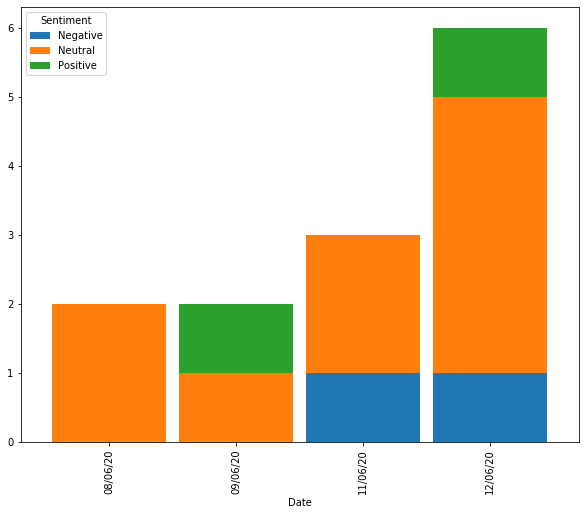

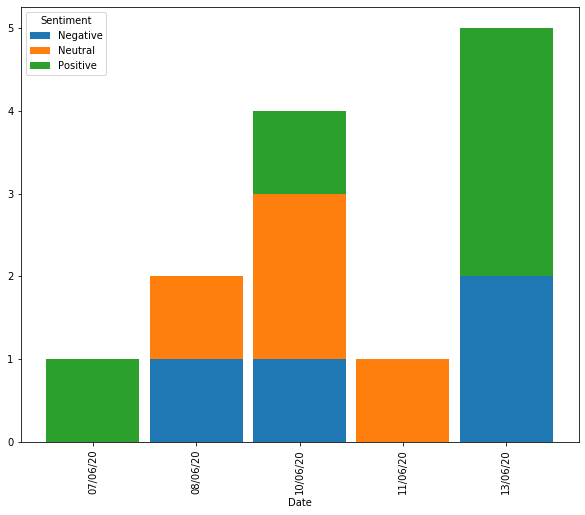

In [12]:
#plotting the sentiment of different users

for i in range(1,11):
    data1=data.groupby('User').get_group(arr[len(arr)-i])
    sentiment_dates = data1.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()
    sentiment_dates.plot(kind='bar',stacked=True,width=0.9,figsize=(10, 8))
    

In [13]:
#Region profiling

In [14]:
#removing all the elements or tweets which does not have any specific location

#data.set_index("Location")
datar=data.iloc[data.groupby('Location').User.transform('size').argsort(kind='mergesort')]
datar.dropna(subset=["Location"])

,User,Tweet,Location,Retweet Count,Date,Cleaned_tweet,polarity,Sentiment
8,amitkau,No China 🇨🇳 please! Next Indian bidder to ...,"Mumbai, India 🇮🇳",0,12/06/20,"['no', 'china', 'pleas', 'next', 'indian', 'bi...",0.00,Neutral
14,RamitKumarThak2,RT : Launched #SAHAS World's first #entrepr...,"नई दिल्ली, भारत",6,12/06/20,"['rt', 'launch', 'saha', 'world', 's', 'first'...",0.25,Positive
22,FreeVoice__News,FLASH\n#JKUT Update\n#AtmanirbharBharatAbhiyan...,"Jammu, Jammu And Kashmir",0,12/06/20,"['flash', 'jkut', 'updat', 'atmanirbharbharata...",0.00,Neutral
25,bhartiye_komal,We Indian are treating Chinese app as an escap...,"रामपुर, भारत",0,12/06/20,"['we', 'indian', 'are', 'treat', 'chines', 'ap...",0.00,Neutral
31,dnr_india,"#present to you, #IndianRailways\nOne of the p...","Bhopal, India",0,12/06/20,"['present', 'to', 'you', 'indianrailway', 'one...",0.15,Positive
...,...,...,...,...,...,...,...,...
830,DileepNagar2,RT : Ram Ram ji 🙏 Support this cause Indians ...,Baran Rajsthan भारत,568,09/06/20,"['rt', 'ram', 'ram', 'ji', 'support', 'this', ...",0.00,Neutral
831,AnilPra91568389,RT : Ram Ram ji 🙏 Support this cause Indians ...,"New Delhi, India",568,09/06/20,"['rt', 'ram', 'ram', 'ji', 'support', 'this', ...",0.00,Neutral
848,umeshtomar13,RT : Ram Ram ji 🙏 Support this cause Indians ...,"Noida, India",568,09/06/20,"['rt', 'ram', 'ram', 'ji', 'support', 'this', ...",0.00,Neutral
854,parmarkanaksinh,RT : Ram Ram ji 🙏 Support this cause Indians ...,। देवताअों अोर वीरों की भुमि ।,568,09/06/20,"['rt', 'ram', 'ram', 'ji', 'support', 'this', ...",0.00,Neutral


In [15]:
data["Location"].value_counts()

India                    1285
New Delhi, India          531
Mumbai, India             366
Bengaluru, India          175
Mumbai                    157
                         ... 
Black Earth, WI             1
Shangri-La                  1
vasmath                     1
krishnagiri,Tamilnadu       1
Virudhachalam, India        1
Name: Location, Length: 3041, dtype: int64

In [16]:
date=data["Date"].unique()
date

array(['12/06/20', '11/06/20', '10/06/20', '09/06/20', '08/06/20',
       '07/06/20', '06/06/20', '05/06/20', '04/06/20', '14/06/20',
       '13/06/20'], dtype=object)

for date in data["Date"]:
    y=data[data.Location == 'Mumbai, India'].Sentiment.value_counts()

In [17]:
#grouping the date and sentiment when the location i Delhi

data1=datar.groupby('Location').get_group("New Delhi, India")
sentiment_dates = data1.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()
sentiment_dates



Sentiment,Negative,Neutral,Positive
Date,,,
05/06/20,NaN,2.0,5.0
06/06/20,2.0,12.0,27.0
07/06/20,10.0,12.0,23.0
08/06/20,3.0,11.0,22.0
09/06/20,2.0,19.0,8.0
10/06/20,1.0,14.0,10.0
11/06/20,4.0,23.0,4.0
12/06/20,5.0,16.0,13.0
13/06/20,3.0,11.0,46.0


In [18]:
#grouping the date and sentiment when the location i Mumbai

data2=datar.groupby('Location').get_group("Mumbai, India")
sentiment_dates2 = data2.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()
sentiment_dates2


Sentiment,Negative,Neutral,Positive
Date,,,
04/06/20,NaN,NaN,1.0
05/06/20,1.0,4.0,3.0
06/06/20,6.0,5.0,22.0
07/06/20,5.0,17.0,20.0
08/06/20,4.0,13.0,17.0
09/06/20,1.0,21.0,12.0
10/06/20,NaN,12.0,4.0
11/06/20,5.0,11.0,9.0
12/06/20,1.0,4.0,7.0


In [19]:
#grouping the date and sentiment when the location is Bengaluru

data3=datar.groupby('Location').get_group("Bengaluru, India")
sentiment_dates2 = data3.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()
sentiment_dates2

Sentiment,Negative,Neutral,Positive
Date,,,
04/06/20,NaN,NaN,2.0
05/06/20,NaN,1.0,NaN
06/06/20,3.0,7.0,10.0
07/06/20,NaN,11.0,7.0
08/06/20,1.0,8.0,4.0
09/06/20,1.0,5.0,6.0
10/06/20,NaN,4.0,3.0
11/06/20,2.0,3.0,2.0
12/06/20,3.0,7.0,4.0


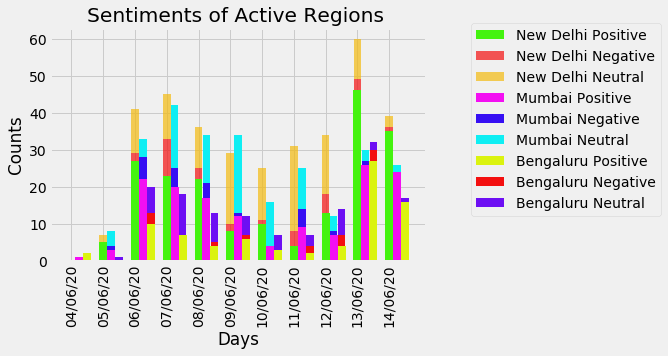

In [20]:
#Plotting the graphs for the region Profiling

#labels = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6','Day7','Day8','Day9','Day10','Day11']
labels =['04/06/20', '05/06/20', '06/06/20', '07/06/20', '08/06/20',
       '09/06/20', '10/06/20', '11/06/20', '12/06/20', '13/06/20',
       '14/06/20']

pos=np.array([0,5,27,23,22,8,10,4,13,46,35])
neg=np.array([0,0,2,10,3,2,1,4,5,3,1])               # Counts of the first region
neu=np.array([0,2,12,12,11,19,14,23,16,11,3])

pos1=np.array([1,3,22,20,17,12,4,9,7,26,24])
neg1=np.array([0,1,6,5,4,1,0,5,1,1,0])                   # Counts of the Second region
neu1=np.array([0,4,5,17,13,21,12,11,4,3,2])

pos2=np.array([2, 0 , 10, 7, 4, 6, 3,2,4,27,16])
neg2=np.array([0,0,3,0,1,1,0,2,3,3,0])                    # Counts of the third region
neu2=np.array([0,1,7,11,8,5,4,3,7,2,1])
plt.style.use('fivethirtyeight')



# plot details
bar_width = 0.25
epsilon = .010                                             # Code for clustered stacked_bar graph.
opacity = 0.7
pos_bar_positions = np.arange(len(labels))
neg_bar_positions = pos_bar_positions + bar_width
neu_bar=  neg_bar_positions + bar_width
# make bar plots

Pos_bar1= plt.bar(pos_bar_positions, pos, bar_width,
                              color='#44F30F',
                              label='New Delhi Positive')
Neg_bar1= plt.bar(pos_bar_positions,neg,bar_width-epsilon,bottom=pos, alpha=opacity,
                              color='#F30F0F',
                              label='New Delhi Negative')
Neu_bar1= plt.bar(pos_bar_positions,neu,bar_width-epsilon,bottom=neg+pos, alpha=opacity,
                              color='#F3BB0F',
                              label='New Delhi Neutral')

Pos_bar2= plt.bar(neg_bar_positions, pos1, bar_width,
                              color='#F30FF2',
                              label='Mumbai Positive')
Neg_bar2= plt.bar(neg_bar_positions,neg1,bar_width-epsilon,bottom=pos1,
                             color='#360FF3',
                             label='Mumbai Negative')
Neu_bar2= plt.bar(neg_bar_positions,neu1,bar_width-epsilon,bottom=neg1+pos1,
                              color='#0FEEF3',
                              label='Mumbai Neutral')


Pos_bar3= plt.bar(neu_bar, pos2, bar_width,
                              color='#DBF30F',
                              label='Bengaluru Positive')
                  
Neg_bar3= plt.bar(neu_bar,neg2,bar_width-epsilon,bottom=pos2,
                              color='#F30F0F',
                              label='Bengaluru Negative')
                  
Neu_bar3= plt.bar( neu_bar,neu2,bar_width-epsilon,bottom=neg2+pos2,
                              color='#6D0FF3',
                              label='Bengaluru Neutral')

plt.xticks( pos_bar_positions,labels, rotation=90)
plt.ylabel('Counts')
plt.xlabel('Days')
plt.title('Sentiments of Active Regions ')
plt.legend(bbox_to_anchor=(1.1, 1.05))
#sns.despine()
plt.show()


In [21]:
#Dealing with the hashtags

data["Tweet"]=data["Tweet"].str.replace("#AtmaNirbharBharat","")
data["Tweet"]=data["Tweet"].str.replace("#AtmanirbharBharatAbhiyan","")
data["Tweet"]=data["Tweet"].str.replace("#AtmanirbharBharat","")
data["Tweet"]=data["Tweet"].str.replace("#AtmaNirbharBharat","")

In [22]:
def detect_hashtag(text):
    return re.findall(r'\B#\w*[a-zA-Z]+\w*', text)


data["hashtags"] = data.Tweet.apply(detect_hashtag)

In [23]:
#frequency of top ten hashtags

data["hashtags"].value_counts().head(10)

[]                                             7071
[#A]                                           2617
[#payalrohatgi]                                1094
[#BoycottChina]                                 793
[#AmitShah]                                     133
[#Swadeshi_Digital_Signature]                   120
[#BanChineseProducts, #boycottchina, #make]      83
[#COVID19]                                       82
[#railapprentice]                                77
[#AtmaNirbharB]                                  50
Name: hashtags, dtype: int64

In [24]:
#Counting the frequency datewise manually
count=0
date_tweet=[]
h_senti=[]

for i in range(0,len(data["hashtags"])):
    if (data["hashtags"].iloc[i] == ['#BoycottChina'] ):
        date_tweet.append(data["Date"].iloc[i])
        h_senti.append(data["Sentiment"].iloc[i])

In [25]:
df = pd.DataFrame(list(zip(date_tweet, h_senti)), columns =['Date', 'Sentiment'])
df["Date"].value_counts()    

06/06/20    475
07/06/20    239
09/06/20     36
08/06/20     25
10/06/20     11
11/06/20      5
12/06/20      1
13/06/20      1
Name: Date, dtype: int64

In [26]:
pos=0
neg=0
neu=0
for i in range(0,len(df["Date"])):
    if df["Date"].iloc[i] == '07/06/20' :
        if df["Sentiment"].iloc[i] == "Positive": 
            pos=pos+1
        elif df["Sentiment"].iloc[i] == "Negative":
            neg=neg+1
        else:
            neu=neu+1

In [27]:
print(pos)
print(neg)
print(neu)

239
0
0


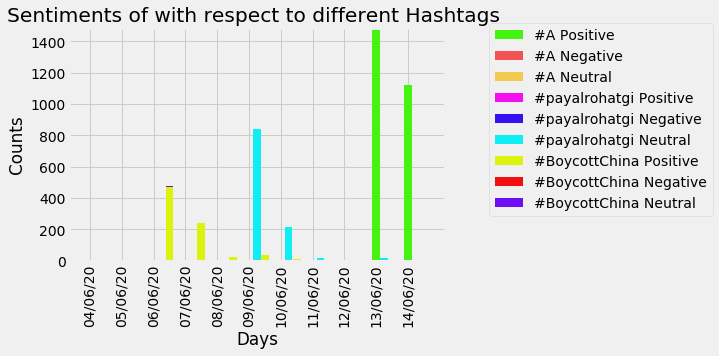

In [28]:
labels =['04/06/20', '05/06/20', '06/06/20', '07/06/20', '08/06/20',
       '09/06/20', '10/06/20', '11/06/20', '12/06/20', '13/06/20',
       '14/06/20']


pos=np.array([0,0,0,0,1,0,0,0,0,1489,1119])
neg=np.array([0,0,0,1,1,0,0,0,0,0,0])               # Counts of the first region
neu=np.array([0,0,0,1,0,0,5,0,0,0,0])

pos1=np.array([0,0,0,0,0,0,0,0,0,0,0])
neg1=np.array([0,0,0,0,0,0,0,0,0,0,0])                   # Counts of the Second region
neu1=np.array([0,0,0,0,0,844,214,17,2,17,0])


pos2=np.array([0,0,471,239,24,36,11,5,0,1,0])
neg2=np.array([0,0,1,0,0,0,0,0,1,0,0])                    # Counts of the third region
neu2=np.array([0,0,3,0,0,0,0,0,0,0,0])
plt.style.use('fivethirtyeight')



# plot details
bar_width = 0.25
epsilon = .010                                             # Code for clustered stacked_bar graph.
opacity = 0.7
pos_bar_positions = np.arange(len(labels))
neg_bar_positions = pos_bar_positions + bar_width
neu_bar=  neg_bar_positions + bar_width
# make bar plots

Pos_bar1= plt.bar(pos_bar_positions, pos, bar_width,
                              color='#44F30F',
                              label='#A Positive')
Neg_bar1= plt.bar(pos_bar_positions,neg,bar_width-epsilon,bottom=pos, alpha=opacity,
                              color='#F30F0F',
                              label='#A Negative')
Neu_bar1= plt.bar(pos_bar_positions,neu,bar_width-epsilon,bottom=neg+pos, alpha=opacity,
                              color='#F3BB0F',
                              label='#A Neutral')

Pos_bar2= plt.bar(neg_bar_positions, pos1, bar_width,
                              color='#F30FF2',
                              label='#payalrohatgi Positive')
Neg_bar2= plt.bar(neg_bar_positions,neg1,bar_width-epsilon,bottom=pos1,
                             color='#360FF3',
                             label='#payalrohatgi Negative')
Neu_bar2= plt.bar(neg_bar_positions,neu1,bar_width-epsilon,bottom=neg1+pos1,
                              color='#0FEEF3',
                              label='#payalrohatgi Neutral')


Pos_bar3= plt.bar(neu_bar, pos2, bar_width,
                              color='#DBF30F',
                              label='#BoycottChina Positive')
                  
Neg_bar3= plt.bar(neu_bar,neg2,bar_width-epsilon,bottom=pos2,
                              color='#F30F0F',
                              label='#BoycottChina Negative')
                  
Neu_bar3= plt.bar( neu_bar,neu2,bar_width-epsilon,bottom=neg2+pos2,
                              color='#6D0FF3',
                              label='#BoycottChina Neutral')

plt.xticks( pos_bar_positions,labels, rotation=90)
plt.ylabel('Counts')
plt.xlabel('Days')
plt.title('Sentiments of with respect to different Hashtags ')
plt.legend(bbox_to_anchor=(1.1, 1.05))
#sns.despine()
plt.show()


for i in range(0,1000):
    
    for data["Tweet"].iloc[i] in data["Tweet"]:
         for j in range(0,1):
            if data["hashtags"].iloc[j]==["#A"]:
                print("hello")